In [5]:
library(tm)
library(tidytext)
library(qdap)
library(tidyverse)
library(wordcloud)
library(tibble)
library(plotrix)
library(stringr)

─ Attaching packages ──────────────────── tidyverse 1.2.1 ─
✔ ggplot2 2.2.1     ✔ purrr   0.2.5
✔ tidyr   0.8.1     ✔ dplyr   0.7.5
✔ readr   1.1.1     ✔ forcats 0.3.0
─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ ggplot2::%+%()      masks qdapRegex::%+%()
✖ ggplot2::annotate() masks NLP::annotate()
✖ dplyr::explain()    masks qdapRegex::explain()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::id()         masks qdapTools::id()
✖ dplyr::lag()        masks stats::lag()


In [3]:
# 0. 환경설정 -------------------------------------------------------
library(tm)
if (!require("tidytext")) {install.packages("tidytext")}
library(qdap)
if (!require("tidyverse")) {install.packages("tidyverse")}
library(wordcloud)
library(tibble)
library(plotrix)
library(stringr)

clean_text <- function(text){
  text <- tolower(text)
  # text <- removeNumbers(text)
  # text <- bracketX(text)
  text <- replace_number(text)
  text <- replace_abbreviation(text)
  text <- replace_contraction(text)
  text <- replace_symbol(text)
  text <- removePunctuation(text)
  text <- stripWhitespace(text)
  text <- str_replace_all(text, "americans", "america")
  
  indexes <- which(text == "")
  if(length(indexes) > 0){
    text <- text[-indexes]
  } 
  return(text)
}

clean_corpus <- function(corpus){
  corpus <- tm_map(corpus, content_transformer(replace_abbreviation))
  corpus <- tm_map(corpus, stripWhitespace)
  corpus <- tm_map(corpus, removePunctuation)
  corpus <- tm_map(corpus, removeNumbers)
  corpus <- tm_map(corpus, removeWords, c(stopwords("en"), "Top200Words"))
  corpus <- tm_map(corpus, content_transformer(tolower))
  return(corpus)
}

Loading required package: tidytext
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘tidytext’”also installing the dependencies ‘ISOcodes’, ‘hunspell’, ‘tokenizers’, ‘janeaustenr’, ‘stopwords’




  There is a binary version available but the source version is later:
         binary source needs_compilation
tidytext  0.1.8  0.1.9             FALSE


The downloaded binary packages are in
	/var/folders/s7/1f8qprf53tn7x9t82ghqn9rm0000gn/T//RtmpLcqJHL/downloaded_packages


installing the source package ‘tidytext’

Loading required package: qdapDictionaries
Loading required package: qdapRegex
Loading required package: qdapTools
Loading required package: RColorBrewer

Attaching package: ‘qdap’

The following objects are masked from ‘package:tm’:

    as.DocumentTermMatrix, as.TermDocumentMatrix

The following object is masked from ‘package:NLP’:

    ngrams

The following object is masked from ‘package:base’:

    Filter

Loading required package: tidyverse
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘tidyverse’”also installing the dependencies ‘rematch’, ‘processx’, ‘cellranger’, ‘callr’, ‘selectr’, ‘dbplyr’, ‘forcats’, ‘haven’, ‘hms’, ‘modelr’, ‘readr’, ‘readxl’, ‘reprex’, ‘rvest’




  There are binary versions available but the source versions are later:
          binary source needs_compilation
processx 2.0.0.1  3.1.0              TRUE
callr      2.0.3  2.0.4             FALSE
modelr     0.1.1  0.1.2             FALSE
reprex     0.1.1  0.1.2             FALSE


The downloaded binary packages are in
	/var/folders/s7/1f8qprf53tn7x9t82ghqn9rm0000gn/T//RtmpLcqJHL/downloaded_packages


installing the source packages ‘processx’, ‘callr’, ‘modelr’, ‘reprex’

Warning message:
“package ‘plotrix’ was built under R version 3.4.4”
Attaching package: ‘stringr’

The following object is masked from ‘package:qdap’:

    %>%



In [6]:
# 1. 데이터 불러오기 -------------------------------------------------------
obama <- readLines("obama.txt", encoding = "UTF-8")
trump <- readLines("trump.txt", encoding = "UTF-8")

In [8]:
# 2. 데이터 전처리 -------------------------------------------------------
make_corpus <- function(text) {
  text_clean <- clean_text(text)
  text_source <- VectorSource(text_clean)
  text_corpus <- VCorpus(text_source)
  corpus <- clean_corpus(text_corpus)
}

obama_corpus <- make_corpus(obama)
trump_corpus <- make_corpus(trump)

# 3. 말뭉치를 데이터프레임으로 변환 --------------------------------------

word_freq <- function(corpus) {
    doc_tdm <- TermDocumentMatrix(corpus)
    doc_m <- as.matrix(doc_tdm)
    doc_term_freq <- rowSums(doc_m)
    doc_word_freqs <- data.frame(term = names(doc_term_freq),
                             num = doc_term_freq) %>% arrange(desc(num))
    return(doc_word_freqs)
}

obama_word_freqs <- word_freq(obama_corpus)
trump_word_freqs <- word_freq(trump_corpus)

Warning message:
“package ‘bindrcpp’ was built under R version 3.4.4”

Warning message in wordcloud(obama_word_freqs$term, obama_word_freqs$num, max.words = 100, :
“democracy could not be fit on page. It will not be plotted.”Warning message in wordcloud(obama_word_freqs$term, obama_word_freqs$num, max.words = 100, :
“people could not be fit on page. It will not be plotted.”Warning message in wordcloud(obama_word_freqs$term, obama_word_freqs$num, max.words = 100, :
“young could not be fit on page. It will not be plotted.”Warning message in wordcloud(obama_word_freqs$term, obama_word_freqs$num, max.words = 100, :
“together could not be fit on page. It will not be plotted.”Warning message in wordcloud(obama_word_freqs$term, obama_word_freqs$num, max.words = 100, :
“made could not be fit on page. It will not be plotted.”Warning message in wordcloud(obama_word_freqs$term, obama_word_freqs$num, max.words = 100, :
“america could not be fit on page. It will not be plotted.”Warning message in wordcloud(obama_word_freqs$term, obama_word_freqs$num, max.words = 100, 

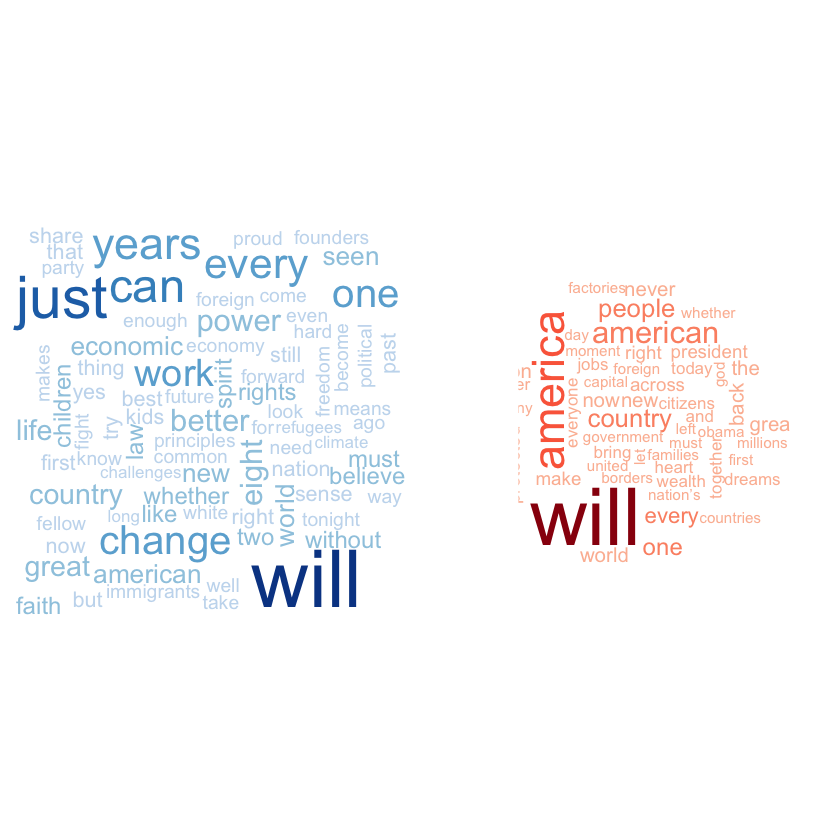

In [9]:
# 4. 시각화 --------------------------------------------------------------
## 4.1. 단어구름----------------------------------------------------------
par(mfrow=c(1,2))
blues <- brewer.pal(8, "Blues")[-(1:2)]
wordcloud(obama_word_freqs$term, obama_word_freqs$num, max.words=100, colors=blues)

reds <- brewer.pal(8, "Reds")[-(1:2)]
wordcloud(trump_word_freqs$term, trump_word_freqs$num, max.words=100, colors=reds)

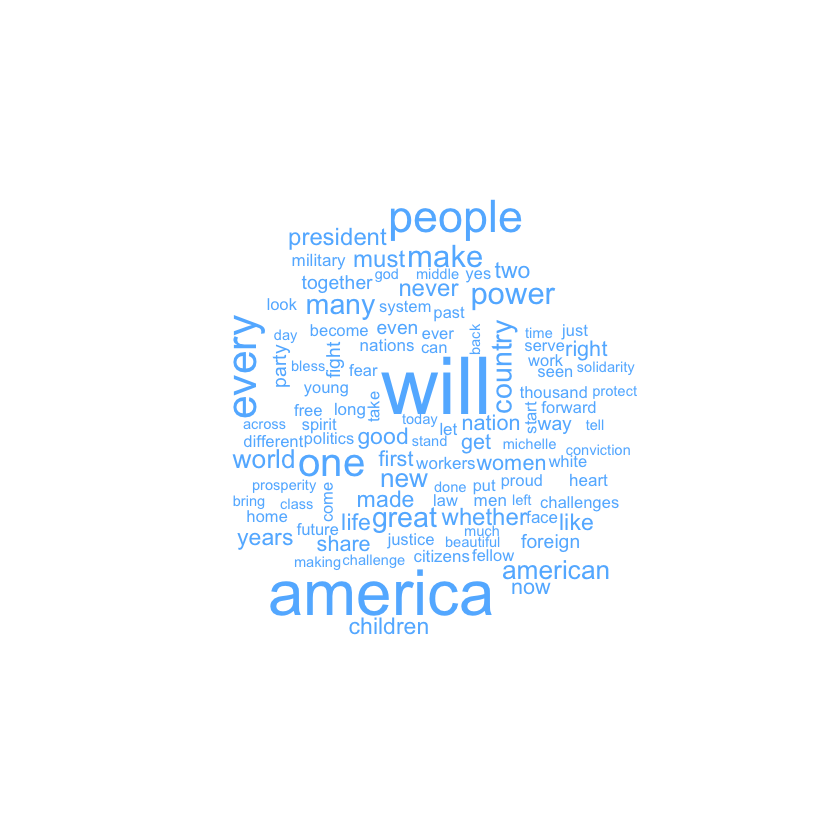

In [11]:
## 4.2. 공통 단어구름

all_obama <- paste(obama, collapse = " ")
all_trump <- paste(trump, collapse = " ")

obama_trump <- c(all_obama, all_trump)

obama_trump_corpus <- make_corpus(obama_trump)
obama_trump_word_freqs <- word_freq(obama_trump_corpus)

obama_trump_tdm <- TermDocumentMatrix(obama_trump_corpus)
obama_trump_m <- as.matrix(obama_trump_tdm)

commonality.cloud(obama_trump_m,  colors ="steelblue1", max.words=100)

Warning message in strwidth(words[i], cex = size[i], ...):
“conversion failure on '’ve' in 'mbcsToSbcs': dot substituted for <e2>”Warning message in strwidth(words[i], cex = size[i], ...):
“conversion failure on '’ve' in 'mbcsToSbcs': dot substituted for <80>”Warning message in strwidth(words[i], cex = size[i], ...):
“conversion failure on '’ve' in 'mbcsToSbcs': dot substituted for <99>”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“conversion failure on '’ve' in 'mbcsToSbcs': dot substituted for <e2>”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“conversion failure on '’ve' in 'mbcsToSbcs': dot substituted for <80>”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“conversion failure on '’ve' in 'mbcsToSbcs': dot substituted for <99>”Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“유니코드 문자 U+2019에 

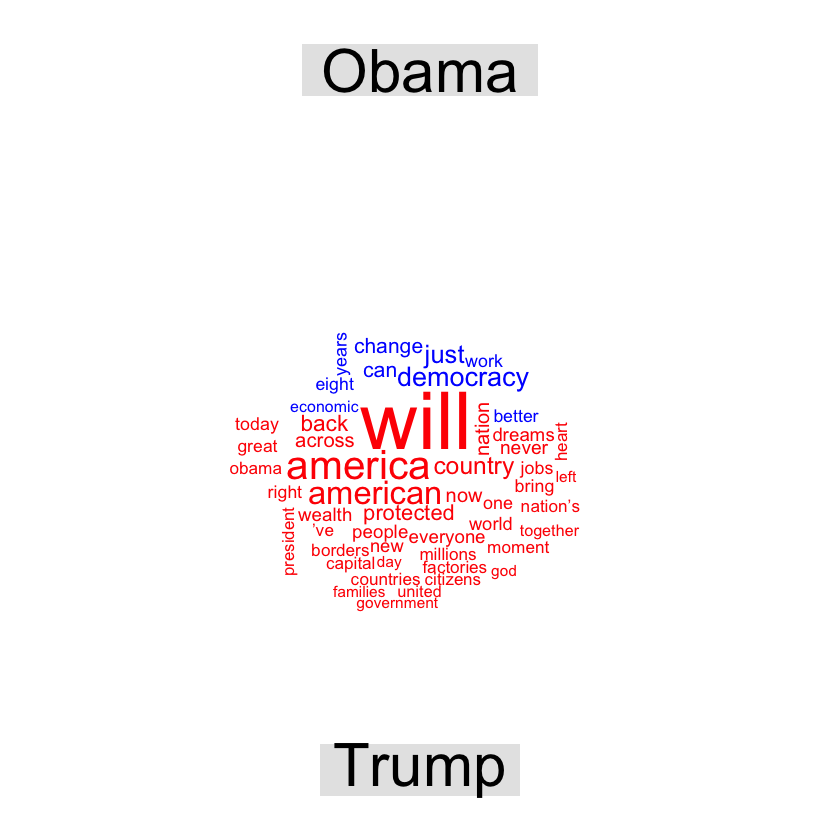

In [12]:
## 4.3. 비교 단어구름
colnames(obama_trump_tdm) <- c("Obama", "Trump")
obama_trump_df <- as.matrix(obama_trump_tdm) %>% as.data.frame()

comparison.cloud(obama_trump_df, colors = c("blue", "red"), max.words = 50)

[1] 5.1 4.1 4.1 2.1

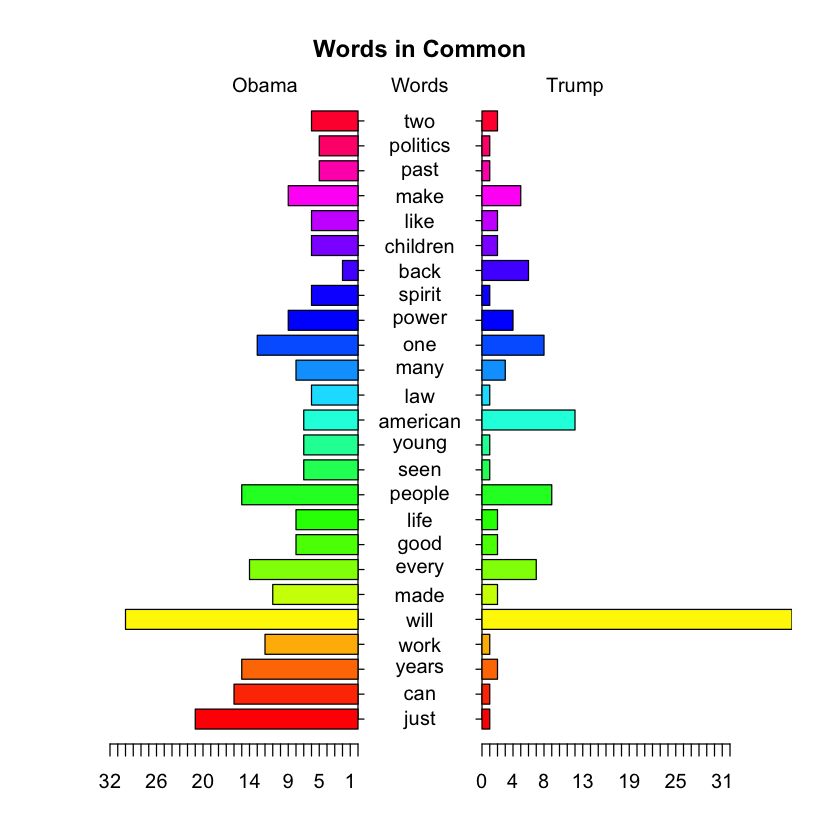

In [13]:
## 4.4. 피라미드 그래프
par(mfrow=c(1,1))

common_words_25 <- obama_trump_df %>% 
  mutate(label = rownames(obama_trump_df)) %>% 
  dplyr::filter(Obama > 0 & Trump >0) %>% 
  mutate(diff = abs(Obama - Trump)) %>% 
  arrange(desc(diff)) %>% slice(1:25)

plotrix::pyramid.plot(common_words_25$Obama, common_words_25$Trump,
             labels = common_words_25$label, gap = 8,
             top.labels = c("Obama", "Words", "Trump"),
             main = "Words in Common", laxlab = NULL, 
             raxlab = NULL, unit = NULL)